# Análise de Sentimentos + Demo de Busca com Twitter

## Twitter - Busca por Termos

In [6]:
query = "corinthians"

# Twitter

In [7]:
twitter_api = load_api()
tweets, max_id = tweet_search(twitter_api, query, max_tweets=500)
tweets_text = convert_structure_to_tweet(tweets)

found 100 tweets of  corinthians
found 100 tweets of  corinthians
found 100 tweets of  corinthians
found 100 tweets of  corinthians
found 100 tweets of  corinthians


In [8]:
tweets_text[:5]

['Hahaha... coloca no DVD @Corinthians https://t.co/kUoon2gjgr',
 '280 caracteres não serve para expressar tamanha indignação que tenho por CERTOS JOGADORES que estão no Corinthians',
 'RT @EstadaoEsporte: CONTA NÃO FECHA! Auditoria mostra que @Corinthians precisa pagar quase R$ 2 bilhões pela arena\nhttps://t.co/WZSI9Td187…',
 'RT @Fail_Futebol: Quando o erro é contra, chora e pede a união dos clubes. Quando é a favor (na maioria das vezes), faz piadinha. https://t…',
 'RT @ResgateTricolor: Gabriel é denunciado no STJD por provocação obscena após gol do Corinthians\n\nhttps://t.co/gRcOsqjEhW https://t.co/7x5r…']

In [ ]:


query = twitter_api.search.tweets(q = "febre amarela", result_type='recent', lang='pt', count=200)

#-----------------------------------------------------------------------
# Tempo da query
#-----------------------------------------------------------------------
print ("Search complete (%.3f seconds)" % (query["search_metadata"]["completed_in"]))

#-----------------------------------------------------------------------
# Loop dos resultados
#-----------------------------------------------------------------------
for result in query["statuses"]:
    print ("(%s) @%s %s" % (result["created_at"], result["user"]["screen_name"], result["text"]))

In [ ]:
#query = twitter_api.search.tweets(q = "", result_type='recent', lang='pt', count=20)

query = twitter_api.search.tweets(q = "north korea", result_type='recent', lang='pt', count=50)

#-----------------------------------------------------------------------
# Tempo da query
#-----------------------------------------------------------------------
print ("Search complete (%.3f seconds)" % (query["search_metadata"]["completed_in"]))

#-----------------------------------------------------------------------
# Loop dos resultados
#-----------------------------------------------------------------------
for result in query["statuses"]:
    print ("(%s) @%s %s" % (result["created_at"], result["user"]["screen_name"], result["text"]))

# Análise de Sentimentos

## Polaridades (Positiva, Negativa, Neutra)

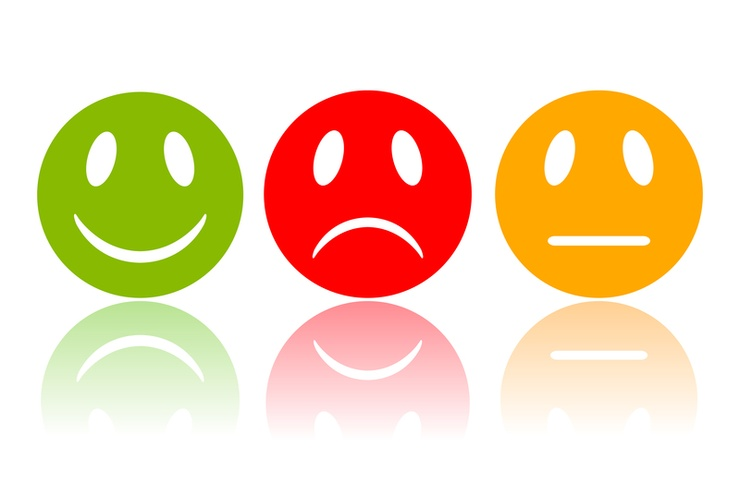

In [9]:
from IPython.display import Image
Image(filename='Sentiment-Analysis.jpg')

## Uso do textblob para analise de sentimentos - Polaridade

In [1]:
from textblob import TextBlob
def analize_sentiments(tweets):
    tweets_sentiments = []
    pos = neg = neutral = 0
    for tweet in tweets:
        # Create a list with all the terms
        blob = TextBlob(tweet)
        polarity = blob.sentiment.polarity
        #print blob.sentiment.subjectivity
        #print (os.listdir(tweet["text"]))
        if polarity < 0:
            sentiment = "negative"
            neg+=1
        elif polarity == 0:
            sentiment = "neutral"
            neutral+=1
        else:
            sentiment = "positive"
            pos+=1

        tweets_sentiments.append([sentiment, polarity, tweet] )
        
    return tweets_sentiments, pos, neg, neutral
    

In [2]:
import tweepy
from tweepy import OAuthHandler
def load_api():
    ''' Function that loads the twitter API after authorizing the user. '''
    CONSUMER_KEY = '7Q5yEwrYLAUkYLXna0ZGTfefD'
    CONSUMER_SECRET = '5A1xx6c0wvIqZFgF6kn0bPAfPo7ERhXgAslBJeKZ66JPVY10uc'
    OAUTH_TOKEN = '2904474861-SuqqjBrphTNAI1rGHAecrQf5wT4ByauhEKjPdXC'
    OAUTH_TOKEN_SECRET = 'YKXb7UjHUiLAZ04r6KOTjm9s6lrx7GZcRGA9fqJTPxMHw'
    
    
    consumer_key = CONSUMER_KEY
    consumer_secret = CONSUMER_SECRET
    access_token = OAUTH_TOKEN
    access_secret = OAUTH_TOKEN_SECRET
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    # load the twitter API via tweepy
    return tweepy.API(auth)

In [3]:
def tweet_search(api, query, max_tweets): #, max_id, since_id, geocode):
    ''' Function that takes in a search string 'query', the maximum
        number of tweets 'max_tweets', and the minimum (i.e., starting)
        tweet id. It returns a list of tweepy.models.Status objects. '''

    searched_tweets = []
    while len(searched_tweets) < max_tweets:
        remaining_tweets = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=remaining_tweets )#,
                                    #since_id=str(since_id), max_id=str(max_id-1))
#                                    geocode=geocode)
            print('found',len(new_tweets),'tweets of ', query)
            if not new_tweets:
                print('no tweets found')
                break
            searched_tweets.extend(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError:
            print('exception raised, waiting 15 minutes')
            print('(until:', dt.datetime.now()+dt.timedelta(minutes=15), ')')
            time.sleep(15*60)
            break # stop the loop  
    return searched_tweets, max_id

In [4]:
def convert_structure_to_tweet(tweets):
    tweets_only_text = []
    for tweet in tweets:
        tweets_only_text.append(tweet._json['text'])
    return tweets_only_text

In [5]:
import pandas as pd
def analyse_tweets_query(queries, max_tweets):
    
    df = pd.DataFrame(columns=["Query","Positive", "Negative", "Neutral"  ], index=range(len(queries)))
    i = 0
    twitter_api = load_api()
    for query in queries:       
        tweets, max_id = tweet_search(twitter_api, query, max_tweets)
        tweets_text = convert_structure_to_tweet(tweets)
        tweets_sentiments, pos, neg, neutral = analize_sentiments(tweets_text)
        total = pos + neg + neutral
        #print ("Sentiment Analysis Twitter")
        #print ("Query: ", query)
        #print ("Positive: {0:.0f} % ".format(pos/total * 100) )
        #print ("Negative: {0:.0f} % ".format(neg/total * 100) )
        #print ("Neutral: {0:.0f} % ".format(neutral/total * 100) )
        
        df.loc[i].Query = query              
        df.loc[i].Positive = pos/total * 100
        df.loc[i].Negative = neg/total * 100
        df.loc[i].Neutral = neutral/total * 100
                      
        #df.loc[i]["Query"] = query
        #df.loc[i]["Positive"] = pos/total * 100
        #df.loc[i]["Negative"] = neg/total * 100
        #df.loc[i]["Neutral"] = neutral/total * 100
        i += 1
    return df

In [12]:
queries = ["Elisabeth Moss", "North Korean", "Trump", "Obama"  ]
queries = ["Trump", "Obama"  ]
queries = ["Elisabeth Moss", "North Korean", "Trump", "Obama"  ]


queries = ["Jennifer Lawrence", "Javier Bardem"]

queries = ["Trump", "Obama",  "Kim Jong-un"] # , "Michael Phelps"]
df2 = analyse_tweets_query(queries,   max_tweets = 500)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
df2

found 100 tweets of  Trump
found 100 tweets of  Trump
found 100 tweets of  Trump
found 100 tweets of  Trump
found 100 tweets of  Trump
found 100 tweets of  Obama
found 100 tweets of  Obama
found 100 tweets of  Obama
found 100 tweets of  Obama
found 100 tweets of  Obama
found 100 tweets of  Kim Jong-un
found 100 tweets of  Kim Jong-un
found 100 tweets of  Kim Jong-un
found 100 tweets of  Kim Jong-un
found 100 tweets of  Kim Jong-un
-------------------------------------------------
Tweets Sentiment Analysis (%)


,Query,Positive,Negative,Neutral
0,Trump,29,20.8,50.2
1,Obama,29.4,20.2,50.4
2,Kim Jong-un,23,13,64


In [13]:
queries = ["Elisabeth Moss", "North Korean", "Trump", "Obama"  ]
queries = ["Trump", "Obama"  ]
queries = ["coke", "pepsi"  ]
df2 = analyse_tweets_query(queries,   max_tweets = 500)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
df2

found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  coke
found 100 tweets of  pepsi
found 100 tweets of  pepsi
found 100 tweets of  pepsi
found 100 tweets of  pepsi
found 100 tweets of  pepsi
-------------------------------------------------
Tweets Sentiment Analysis (%)


,Query,Positive,Negative,Neutral
0,coke,28,19,53
1,pepsi,16,12,72


In [ ]:
import time
queries = ["Trump", "Obama"  ]
queries = ["Elisabeth Moss", "North Korean", "Trump", "Obama"  ]
queries = ["Lula", "Michel Temer", "Moro", "Gilmar Mendes"  ]
df2 = analyse_tweets_query(queries,   max_tweets = 700)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
print (time.ctime())
df2

In [ ]:
import time
queries = ["Trump", "Obama"  ]
queries = ["Elisabeth Moss", "North Korean", "Trump", "Obama"  ]
queries = ["Lula", "Michel Temer", "Moro", "Gilmar Mendes"  ]
df2 = analyse_tweets_query(queries,   max_tweets = 700)
print
print ("-------------------------------------------------")
print ("Tweets Sentiment Analysis (%)")
print (time.ctime())
df2

In [ ]:
dict = {'idade': 30,
         'Nomes': ["Vladimir", "UEPB"]
       }

In [ ]:
dict

In [ ]:
dict['idade']

In [ ]:
dict['Nomes'][1]

In [ ]:
lst = [x**2 for x in range(20)]

In [ ]:
lst

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=["Nome", "Idade"], data=[ ("Vladimir", 40) ,("Eleonilia", 23) ])
df.loc[2] = ["Pedro",  30]
df